In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

y_train_flatten = y_train.reshape(y_train.shape[0], -1).T
y_test_flatten = y_test.reshape(y_test.shape[0], -1).T

In [7]:
def initialize_parameters(n_x, n_h1, n_h2, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h1 -- size of the hidden layer1
    n_h2 -- size of the hidden layer2
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape (n_y, n_h2)
                    b3 -- bias vector of shape (n_y, 1)
                    k0 -- k0 value
                    k1 -- k1 value
                    k2 -- k2 value
    """
    
    np.random.seed(42)
    

    W1 = np.random.randn(n_h1, n_x) * 0.1
    b1 = np.zeros(shape=(n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1) * 0.1
    b2 = np.zeros(shape=(n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.1
    b3 = np.zeros(shape=(n_y, 1))
    
    k0 = np.random.randn(1, 1) * 0.1
    k0 = k0[0][0]
    k1 = np.random.randn(1, 1) * 0.1
    k1 = k1[0][0]
    k2 = np.random.randn(1, 1) * 0.1
    k2 = k2[0][0]
    
    
    assert(W1.shape == (n_h1, n_x))
    assert(b1.shape == (n_h1, 1))
    assert(W2.shape == (n_h2, n_h1))
    assert(b2.shape == (n_h2, 1))
    assert(W3.shape == (n_y, n_h2))
    assert(b3.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "k0": k0,
                  "k1": k1,
                  "k2": k2}
    
    return parameters

In [8]:
#parameters = initialize_parameters(X_train_flatten.shape[0], 4, 4, y_train_flatten.shape[0])
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))
# print("k0 = " + str(parameters["k0"]))
# print("k1 = " + str(parameters["k1"]))
# print("k2 = " + str(parameters["k2"]))

In [9]:
def forward_propagation(X, y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2", "Z3" and "A3"
    cost -- cross-entropy cost
    """

    m = y.shape[1]
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    k0 = parameters['k0']
    k1 = parameters['k1']
    

    Z1 = np.dot(W1, X) + b1
    A1 = k0 + k1*Z1
    Z2 = np.dot(W2, A1) + b2
    A2 = k0 + k1*Z2
    Z3 = np.dot(W3, A2) + b3
    A3 = 1 / (1 + np.exp(-Z3))
    
    cost = (-1 / m) * np.sum(y * np.log(A3) + (1 - y) * (np.log(1 - A3)))
    
    
    assert(A3.shape == (1, X.shape[1]))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return cache, cost

In [10]:
#cache, cost = forward_propagation(X_train_flatten, y_train_flatten, parameters)

In [11]:
def backward_propagation(parameters, cache, X, y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2", "Z3" and "A3".
    X -- input data 
    y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    k1 = parameters['k1']

    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    Z1 = cache['Z1']
    

    dZ3 = A3 - y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims = True)
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), k1)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), k1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
    
    dk0 = (1 / m) * np.sum(np.dot(W2.T, dZ2))
    dk1 = (1 / m) * np.sum(np.multiply(np.dot(W2.T, dZ2), Z1))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3,
             "dk0": dk0,
             "dk1": dk1}
    
    return grads

In [12]:
#grads = backward_propagation(parameters, cache, X_train_flatten, y_train_flatten)

In [13]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    k0 = parameters['k0']
    k1 = parameters['k1']
    

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    dk0 = grads['dk0']
    dk1 = grads['dk1']
    

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    k0 = k0 - learning_rate * dk0
    k1 = k1 - learning_rate * dk1
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "k0": k0,
                  "k1": k1}
    
    return parameters

In [14]:
#parameters = update_parameters(parameters, grads, learning_rate = 0.005)

In [15]:
def predict(X, y, parameters):
    
    cache, cost = forward_propagation(X, y, parameters)
    A = cache["A3"]
    m = X.shape[1]
    y_prediction = np.zeros((1, m))
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(y_prediction.shape == (1, m))
    
    return y_prediction, cost

In [16]:
def model(X, y, X_test, y_test, num_iterations, print_cost, learning_rate):
    """
    Arguments:
    X -- dataset of shape 
    Y -- labels of shape 
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(42)
    
    n_x = X.shape[0]
    n_y = y.shape[0]
    
    parameters = initialize_parameters(n_x, 4, 4, n_y)
    
    # Loop (gradient descent)
    
    costs = []
    k_0 = []
    k_1 = []

    for i in range(0, num_iterations+1):
         
        # Forward propagation
        cache, cost = forward_propagation(X, y, parameters)
 
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, y)
 
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            costs.append(cost)
            k_0.append(parameters["k0"])
            k_1.append(parameters["k1"])
            
    # Final Value of k0 and k1
    print("Final Value of k0 = {}".format(parameters["k0"]))
    print("Final Value of k1 = {}".format(parameters["k1"]))
    
    # Prediction
    
    prediction_train, train_loss = predict(X, y, parameters)
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - y)) * 100))
    
    prediction_test, test_loss = predict(X_test, y_test, parameters)
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - y_test)) * 100))
    
    print("Train Loss = {}".format(train_loss))
    print("Test Loss = {}".format(test_loss))
    
    print("F1 Score: {} ".format(f1_score(y_test, prediction_test, average='micro')))
    
    d = {"costs": costs, 
         "k0" : k_0, 
         "k1" : k_1,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return parameters, d

In [17]:
parameters, d = model(X_train_flatten, y_train_flatten, X_test_flatten, y_test_flatten, num_iterations = 15000, print_cost = True, learning_rate = 0.01)

Cost after iteration 0: 0.692988
Cost after iteration 1000: 0.687670
Cost after iteration 2000: 0.687541
Cost after iteration 3000: 0.687363
Cost after iteration 4000: 0.686881
Cost after iteration 5000: 0.684158
Cost after iteration 6000: 0.158006
Cost after iteration 7000: 0.027359
Cost after iteration 8000: 0.021110
Cost after iteration 9000: 0.019461
Cost after iteration 10000: 0.018754
Cost after iteration 11000: 0.018400
Cost after iteration 12000: 0.018212
Cost after iteration 13000: 0.018110
Cost after iteration 14000: 0.018053
Cost after iteration 15000: 0.018021
Final Value of k0 = -0.17257283164492804
Final Value of k1 = -1.5785947762718253
Train accuracy: 99.0625 %
Test accuracy: 98.05825242718447 %
Train Loss = 0.01802053774241493
Test Loss = 0.025613597423404157
F1 Score: 0.9782608695652174 


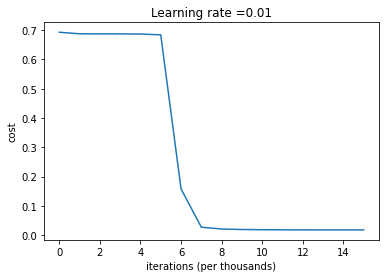

In [18]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

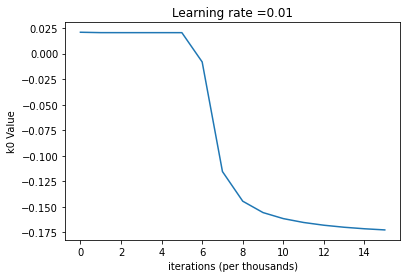

In [19]:
k0 = np.squeeze(d['k0'])
plt.plot(k0)
plt.ylabel('k0 Value')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

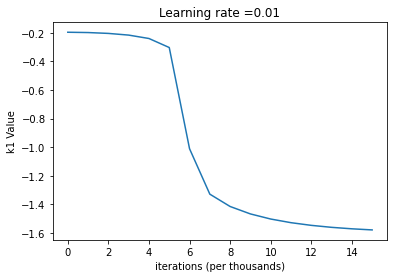

In [20]:
k1 = np.squeeze(d['k1'])
plt.plot(k1)
plt.ylabel('k1 Value')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()